# Opening a Restaurant in Germany

*(as a business idea for a firm)*

### __Hypothesis: Suggesting top locations in every city that could give some advantage.__
Location is a key factor for opening any restaurant.<br>


### __Data Available: Top 50 ranked restaurants of a city with some details__

__Importing Libraries__

In [1]:
import pandas as pd
import numpy as np
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt

__Typethread for location id__ | API 1<br/>
First: testing for location and location id needed for restaurant details

In [2]:
# import requests

# url = "https://worldwide-restaurants.p.rapidapi.com/typeahead"

# payload = "q=munich&language=en_US"
# headers = {
#     "content-type": "application/x-www-form-urlencoded",
#     "X-RapidAPI-Host": "worldwide-restaurants.p.rapidapi.com",
#     "X-RapidAPI-Key": "#APIKey"
# }

# response = requests.request("POST", url, data=payload, headers=headers).json()
# print(response['results']['data'][0]['result_object']['name'],response['results']['data'][0]['result_object']['location_id'])
# L=response['results']['data'][0]['result_object']['location_id']
# loc_id = int(L)

__Restaurant details in the location__ | API 2 (Top 50 available at max)<br/>
Second: testing for restaurant details in the location

In [3]:
# import requests

# url = "https://worldwide-restaurants.p.rapidapi.com/search"

# payload = "language=en_US&limit=100&location_id={}&currency=USD".format(loc_id)
# headers = {
#     "content-type": "application/x-www-form-urlencoded",
#     "X-RapidAPI-Host": "worldwide-restaurants.p.rapidapi.com",
#     "X-RapidAPI-Key": "#APIKey"
# }

# response = requests.request("POST", url, data=payload, headers=headers).json()

# #print(response)
#print(len(response['results']['data']))

__Data collection in a data frame__

In [4]:
# restaurantdata=[]
# for i in range(0,len(response['results']['data'])):
#     data={'name': response['results']['data'][i]['name'],
#           'latitude': response['results']['data'][i]['latitude'],
#           'longitude': response['results']['data'][i]['longitude'],
#           'location_id': response['results']['data'][i]['location_id'],
#           'num_reviews': response['results']['data'][i]['num_reviews'],
#           'ranking_position': response['results']['data'][i]['ranking_position'],
#           'ranking_denominator': response['results']['data'][i]['ranking_denominator'],
#           'ranking_category': response['results']['data'][i]['ranking_category'],
#           'rating': response['results']['data'][i]['rating'],
#           'address': response['results']['data'][i]['address'],
#           'cuisine': response['results']['data'][i]['cuisine'][0]['name'],
#           'dietary_restrictions': response['results']['data'][i]['dietary_restrictions'][0]['name'],
#           'establishment_types': response['results']['data'][i]['establishment_types'][0]['name'],
#           'price': response['results']['data'][i].get('price') #Key Error handling
#          }
#     restaurantdata.append(data)
#     #print((response['results']['data'][i]))
# restaurantdata_df = pd.DataFrame()
# restaurantdata_df = pd.DataFrame(restaurantdata)
# restaurantdata_df

__Creating a function for the above__ | This simplifies calling for different locations

In [5]:
def restodata(name):
    import requests
    
    ##############################
    # Typethread for location id # 
    ##############################

    url = "https://worldwide-restaurants.p.rapidapi.com/typeahead"
    
    payload = "q={}&language=en_US".format(name)
    headers = {
        "content-type": "application/x-www-form-urlencoded",
        "X-RapidAPI-Host": "worldwide-restaurants.p.rapidapi.com",
        "X-RapidAPI-Key": "#APIKey"              #APIKey
    }

    response1 = requests.request("POST", url, data=payload, headers=headers).json()
    L=response1['results']['data'][0]['result_object']['location_id']
    loc_id = int(L)
    #return print(response1['results']['data'][0]['result_object']['name'],response1['results']['data'][0]['result_object']['location_id'])
    # got access to location and location id
    
    ######################################
    # Restaurant details in the location #
    ######################################
    url = "https://worldwide-restaurants.p.rapidapi.com/search"

    payload = "language=en_US&limit=100&location_id={}&currency=USD".format(loc_id)
    headers = {
        "content-type": "application/x-www-form-urlencoded",
        "X-RapidAPI-Host": "worldwide-restaurants.p.rapidapi.com",
        "X-RapidAPI-Key": "#APIKey"               #APIKey
    }

    response = requests.request("POST", url, data=payload, headers=headers).json()
    #return(response)
    # got restaurant details
    
    ###################################
    # Data collection in a data frame #
    ###################################
    
    restaurantdata=[]
    for i in range(0,len(response['results']['data'])):
        data={'name': response['results']['data'][i]['name'],
              'latitude': response['results']['data'][i]['latitude'],
              'longitude': response['results']['data'][i]['longitude'],
              'location_id': response['results']['data'][i]['location_id'],
              'num_reviews': response['results']['data'][i]['num_reviews'],
              'ranking_position': response['results']['data'][i]['ranking_position'],
              'ranking_denominator': response['results']['data'][i]['ranking_denominator'],
              'ranking_category': response['results']['data'][i]['ranking_category'],
              'rating': response['results']['data'][i]['rating'],
              'address': response['results']['data'][i]['address'],
              'cuisine': response['results']['data'][i]['cuisine'][0]['name'],
              #'dietary_restrictions': response['results']['data'][i]['dietary_restrictions'][0]['name'],
              'establishment_types': response['results']['data'][i]['establishment_types'][0]['name'],
              'price': response['results']['data'][i].get('price') #Key Error handling
             }
        restaurantdata.append(data)
        #print((response['results']['data'][i]))
    restaurantdata_df = pd.DataFrame()
    restaurantdata_df = pd.DataFrame(restaurantdata)
    
    #Returning the response for data transformation later
    #Returning the main dataframe created
    
    return response,restaurantdata_df                                          # multiple return
  

In [6]:
response, resto_df = restodata('Leipzig')
resto_df

,name,latitude,longitude,location_id,num_reviews,ranking_position,ranking_denominator,ranking_category,rating,address,cuisine,establishment_types,price
0,ZIHNO Kitchen & Bar,51.33627,12.374522,20995951,101,1,661,restaurant,5.0,"Martin-Luther-Ring 2 Zentrum, 04109, Leipzig, ...",International,Restaurants,$8 - $40
1,Ratskeller,51.336666,12.373047,2084055,1432,2,661,restaurant,4.5,"Lotterstr. 1 Center, new town hall, basement, ...",German,Restaurants,$10 - $39
2,C'est la vie,51.33904,12.368619,8726148,288,3,661,restaurant,4.5,"Zentralstrasse 7, 04109, Leipzig, Saxony Germany",French,Restaurants,$70 - $115
3,Restaurant Alfa,51.337936,12.372094,12415780,101,4,661,restaurant,5.0,"Ratsfreischulstr. 8-10 Zentrum, 04109, Leipzig...",Mediterranean,Restaurants,None
4,Drogerie,51.359104,12.362272,743221,295,5,661,restaurant,4.5,"Schillerweg 36 Gohlis, 04155, Leipzig, Saxony ...",French,Restaurants,$6 - $35
5,Gaststaette Kollektiv,51.322105,12.373281,5601308,250,6,661,restaurant,4.5,"Karl-Liebknecht-Str. 72 Südvorstadt, 04275, Le...",German,Restaurants,None
6,Bayerischer Bahnhof,51.32952,12.3812,1041475,1079,7,661,restaurant,4.0,"Bayrischer Platz 1 Zentrum Südost, 04103, Leip...",German,Restaurants,$6 - $17
7,Indian Crown,51.342125,12.376574,12445257,342,8,661,restaurant,4.0,"Reichsstrasse 15 Zentrum, 04109, Leipzig, Saxo...",Indian,Restaurants,$4 - $19
8,IMPERII Restaurant & Bar,51.342175,12.379426,8531397,201,9,661,restaurant,4.5,"Bruhl 72 Zentrum, 04109, Leipzig, Saxony Germany",Bar,Restaurants,$6 - $29
9,Max Enk,51.33846,12.376985,2690746,267,10,661,restaurant,4.5,"Neumarkt 9 Städtisches Kaufhaus, Zentrum, 0410...",European,Restaurants,None


### __Data Analysis: Data Transformation, finding useful information available, applying clustering algorithm and observing__

__Data Transformation__

Checking the cuisine data for each popular city to add their columns in the dataframe

In [7]:
# response, resto_df = restodata('berlin')
# resto_df

#Checked the cuisine data for each popular city and made the necessary changes

# 1. Berlin
# Extracted Bar, Asian, Healthy, German, Central European, Mediterranean, European, Vegan Options, Gluten Free Options, Seafood  data for separate categories

# 2. Munich
# Added Cafe, Indian | Edited Bars (added Dining bars, Gastropub)

# 3. Hamburg
# Added Steakhouse

# 4. Frankfurt
# No changes required

# 5. Essen
# Added American, pub (edited in bar)

# 6. Stuttgart
# Added Japanese

# 7. Dortmund
# No changes required

# 8. Duesseldorf
# Added Italian

# 9. Hannover
# No changes required

# 10. Leipzig
# No changes required

cuisineslist=[]
for i in range(0,len(response['results']['data'])):
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        cuisineslist.append(response['results']['data'][i]['cuisine'][j]['name'])
cuisineslist
from collections import Counter
c1=Counter(cuisineslist).keys() # equals to list(set(words))
c2=Counter(cuisineslist).values() # counts the elements' frequency
print(Counter(cuisineslist))



Counter({'Vegetarian Friendly': 45, 'European': 27, 'German': 21, 'Vegan Options': 21, 'Central European': 21, 'Gluten Free Options': 12, 'International': 8, 'Bar': 8, 'Mediterranean': 7, 'Asian': 7, 'Vietnamese': 5, 'Italian': 4, 'Pub': 4, 'Contemporary': 3, 'Greek': 3, 'Cafe': 3, 'Brew Pub': 2, 'Healthy': 2, 'French': 2, 'American': 2, 'Fast Food': 2, 'Gastropub': 2, 'Irish': 2, 'Pizza': 2, 'Grill': 1, 'Beer restaurants': 1, 'Indian': 1, 'Spanish': 1, 'Catalan': 1, 'Czech': 1, 'Eastern European': 1, 'Seafood': 1, 'Sushi': 1, 'Fusion': 1})


__Making relevant categories from the available data__

Adding the columns of each popular cuisine after checking for each city.

In [8]:
Bar=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Bar' or response['results']['data'][i]['cuisine'][j]['name'] == 'Brew Pub' or response['results']['data'][i]['cuisine'][j]['name'] == 'Wine Bar' or response['results']['data'][i]['cuisine'][j]['name'] == 'Gastropub' or response['results']['data'][i]['cuisine'][j]['name'] == 'Dining bars' or response['results']['data'][i]['cuisine'][j]['name'] == 'Pub':    ## changes in parameter
            Bar.append(i)                                                    ## changes in list
print('Bar',Bar) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Bar:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Bar']                                                          ## changes in column names
#df1
resto_df['Bar']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

Italian=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Italian' :    ## changes in parameter
            Italian.append(i)                                                    ## changes in list
print('Italian',Italian) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Italian:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Italian']                                                          ## changes in column names
#df1
resto_df['Italian']=df1                                                          ## changes in column names
#resto_df
#----------------------------------------------------------------------------------------------------------------------------

Japanese=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Japanese' :    ## changes in parameter
            Japanese.append(i)                                                    ## changes in list
print('Japanese',Japanese) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Japanese:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Japanese']                                                          ## changes in column names
#df1
resto_df['Japanese']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

American=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'American' :    ## changes in parameter
            American.append(i)                                                    ## changes in list
print('American',American) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in American:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['American']                                                          ## changes in column names
#df1
resto_df['American']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

Steakhouse=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Steakhouse' :    ## changes in parameter
            Steakhouse.append(i)                                                    ## changes in list
print('Steakhouse',Steakhouse) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Steakhouse:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Steakhouse']                                                          ## changes in column names
#df1
resto_df['Steakhouse']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

Cafe=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Cafe' :    ## changes in parameter
            Cafe.append(i)                                                    ## changes in list
print('Cafe',Cafe) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Cafe:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Cafe']                                                          ## changes in column names
#df1
resto_df['Cafe']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

Indian=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Indian' :    ## changes in parameter
            Indian.append(i)                                                    ## changes in list
print('Indian',Indian) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Indian:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Indian']                                                          ## changes in column names
#df1
resto_df['Indian']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

Asian=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Asian':    ## changes in parameter
            Asian.append(i)                                                    ## changes in list
print('Asian',Asian) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Asian:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Asian']                                                          ## changes in column names
#df1
resto_df['Asian']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

Healthy=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Healthy':    ## changes in parameter
            Healthy.append(i)                                                    ## changes in list
print('Healthy',Healthy) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Healthy:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Healthy']                                                          ## changes in column names
#df1
resto_df['Healthy']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

ger=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'German':    ## changes in parameter
            ger.append(i)                                                    ## changes in list
print('German',ger) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()  
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in ger:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['German']                                                          ## changes in column names
#df1
resto_df['German']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

ce=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Central European':    ## changes in parameter
            ce.append(i)                                                    ## changes in list
print('Central European',ce) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()  
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in ce:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Central European']                                                          ## changes in column names
#df1
resto_df['Central European']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

Mediterranean=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Mediterranean':    ## changes in parameter
            Mediterranean.append(i)                                                    ## changes in list
print('Mediterranean',Mediterranean) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()  
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in Mediterranean:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Mediterranean']                                                          ## changes in column names
#df1
resto_df['Mediterranean']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

eu=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'European':    ## changes in parameter
            eu.append(i)                                                    ## changes in list
print('European',eu) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()  
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in eu:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['European']                                                          ## changes in column names
#df1
resto_df['European']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

vo=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Vegan Options':    ## changes in parameter
            vo.append(i)                                                    ## changes in list
print('Vegan Options',vo) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()  
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in vo:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Vegan Options']                                                          ## changes in column names
#df1
resto_df['Vegan Options']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

gfo=[]                                                                       ## changes in list
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Gluten Free Options':    ## changes in parameter
            gfo.append(i)                                                    ## changes in list
print('Gluten Free Options',gfo) # printing indexes                                                ## changes in list
    #print(len(response['results']['data'][i]['cuisine']))
    #print()  
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in gfo:                                                              ## changes in list
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Gluten Free Options']                                                          ## changes in column names
#df1
resto_df['Gluten Free Options']=df1                                                          ## changes in column names
#resto_df

#----------------------------------------------------------------------------------------------------------------------------

seafood=[]
no_of_Rows = len(response['results']['data'])
no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

for i in range(0,len(response['results']['data'])):
    #print(i)
    for j in range(0,len(response['results']['data'][i]['cuisine'])):
        #print(response['results']['data'][i]['cuisine'][j]['name'])
        if response['results']['data'][i]['cuisine'][j]['name'] == 'Seafood':
            seafood.append(i) 
print('Seafood',seafood) # printing indexes
    #print(len(response['results']['data'][i]['cuisine']))
    #print()  
no_of_Rows = len(response['results']['data'])

no_of_Cols = 1

df1 = pd.DataFrame(index=range(no_of_Rows),columns=range(no_of_Cols))

element = 'Available'
for ind in seafood:
    df1.iloc[ind]=element
df1=df1.fillna('N/A')
df1.columns=['Seafood']
#df1
resto_df['Seafood']=df1
#resto_df

Bar [1, 6, 6, 8, 13, 15, 29, 29, 31, 31, 32, 32, 36, 36, 47, 48]
Italian [28, 31, 43, 49]
Japanese []
American [11, 21]
Steakhouse []
Cafe [21, 31, 45]
Indian [7]
Asian [7, 19, 23, 27, 34, 41, 42]
Healthy [1, 32]
German [1, 4, 5, 6, 13, 14, 15, 17, 18, 20, 21, 22, 30, 32, 37, 38, 39, 40, 45, 46, 47]
Central European [2, 4, 6, 9, 14, 15, 17, 18, 20, 22, 24, 25, 26, 28, 32, 33, 37, 38, 39, 46, 47]
Mediterranean [0, 3, 16, 28, 31, 43, 49]
European [2, 5, 6, 9, 12, 14, 15, 16, 17, 18, 20, 22, 25, 26, 28, 29, 30, 32, 33, 36, 37, 38, 39, 46, 47, 48, 49]
Vegan Options [1, 3, 7, 9, 11, 15, 16, 18, 19, 23, 25, 26, 27, 28, 34, 35, 41, 42, 43, 44, 49]
Gluten Free Options [1, 7, 11, 15, 16, 19, 25, 28, 33, 34, 35, 41]
Seafood [34]


In [9]:
resto_df

,name,latitude,longitude,location_id,num_reviews,ranking_position,ranking_denominator,ranking_category,rating,address,...,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,ZIHNO Kitchen & Bar,51.33627,12.374522,20995951,101,1,661,restaurant,5.0,"Martin-Luther-Ring 2 Zentrum, 04109, Leipzig, ...",...,N/A,N/A,N/A,N/A,N/A,Available,N/A,N/A,N/A,N/A
1,Ratskeller,51.336666,12.373047,2084055,1432,2,661,restaurant,4.5,"Lotterstr. 1 Center, new town hall, basement, ...",...,N/A,N/A,Available,Available,N/A,N/A,N/A,Available,Available,N/A
2,C'est la vie,51.33904,12.368619,8726148,288,3,661,restaurant,4.5,"Zentralstrasse 7, 04109, Leipzig, Saxony Germany",...,N/A,N/A,N/A,N/A,Available,N/A,Available,N/A,N/A,N/A
3,Restaurant Alfa,51.337936,12.372094,12415780,101,4,661,restaurant,5.0,"Ratsfreischulstr. 8-10 Zentrum, 04109, Leipzig...",...,N/A,N/A,N/A,N/A,N/A,Available,N/A,Available,N/A,N/A
4,Drogerie,51.359104,12.362272,743221,295,5,661,restaurant,4.5,"Schillerweg 36 Gohlis, 04155, Leipzig, Saxony ...",...,N/A,N/A,N/A,Available,Available,N/A,N/A,N/A,N/A,N/A
5,Gaststaette Kollektiv,51.322105,12.373281,5601308,250,6,661,restaurant,4.5,"Karl-Liebknecht-Str. 72 Südvorstadt, 04275, Le...",...,N/A,N/A,N/A,Available,N/A,N/A,Available,N/A,N/A,N/A
6,Bayerischer Bahnhof,51.32952,12.3812,1041475,1079,7,661,restaurant,4.0,"Bayrischer Platz 1 Zentrum Südost, 04103, Leip...",...,N/A,N/A,N/A,Available,Available,N/A,Available,N/A,N/A,N/A
7,Indian Crown,51.342125,12.376574,12445257,342,8,661,restaurant,4.0,"Reichsstrasse 15 Zentrum, 04109, Leipzig, Saxo...",...,Available,Available,N/A,N/A,N/A,N/A,N/A,Available,Available,N/A
8,IMPERII Restaurant & Bar,51.342175,12.379426,8531397,201,9,661,restaurant,4.5,"Bruhl 72 Zentrum, 04109, Leipzig, Saxony Germany",...,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A
9,Max Enk,51.33846,12.376985,2690746,267,10,661,restaurant,4.5,"Neumarkt 9 Städtisches Kaufhaus, Zentrum, 0410...",...,N/A,N/A,N/A,N/A,Available,N/A,Available,Available,N/A,N/A


Making ranking categorical

In [10]:
resto_df['ranking_category'] = resto_df['ranking_position'].astype("int").apply(lambda x: 'A' if x <= 10 else ('B' if x>10 and x <= 20 else ('C' if x>20 and x <= 30 else ('D' if x>30 and x <= 40 else 'E'))))
#resto_df

Splitting max and min price range

In [11]:
new = resto_df['price'].str.split('-',n=1,expand=True)
new = new.fillna(0)
resto_df['min price']=new[0]
resto_df['max price']=new[1]
#resto_df

*prices for every restaurant is not available*

Converting the rating category

In [12]:
resto_df['rating_category'] = resto_df['rating'].astype("float").apply(lambda x: 'A' if x > 4.5 else ('B' if x>4 and x<=4.5 else 'C'))
#resto_df

Displaying the final dataframe

In [13]:
pd.set_option('display.max_columns', None)
resto_df

,name,latitude,longitude,location_id,num_reviews,ranking_position,ranking_denominator,ranking_category,rating,address,cuisine,establishment_types,price,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood,min price,max price,rating_category
0,ZIHNO Kitchen & Bar,51.33627,12.374522,20995951,101,1,661,A,5.0,"Martin-Luther-Ring 2 Zentrum, 04109, Leipzig, ...",International,Restaurants,$8 - $40,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,N/A,N/A,N/A,N/A,$8,$40,A
1,Ratskeller,51.336666,12.373047,2084055,1432,2,661,A,4.5,"Lotterstr. 1 Center, new town hall, basement, ...",German,Restaurants,$10 - $39,Available,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,Available,N/A,N/A,N/A,Available,Available,N/A,$10,$39,B
2,C'est la vie,51.33904,12.368619,8726148,288,3,661,A,4.5,"Zentralstrasse 7, 04109, Leipzig, Saxony Germany",French,Restaurants,$70 - $115,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,N/A,Available,N/A,N/A,N/A,$70,$115,B
3,Restaurant Alfa,51.337936,12.372094,12415780,101,4,661,A,5.0,"Ratsfreischulstr. 8-10 Zentrum, 04109, Leipzig...",Mediterranean,Restaurants,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,N/A,Available,N/A,N/A,0,0,A
4,Drogerie,51.359104,12.362272,743221,295,5,661,A,4.5,"Schillerweg 36 Gohlis, 04155, Leipzig, Saxony ...",French,Restaurants,$6 - $35,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,Available,N/A,N/A,N/A,N/A,N/A,$6,$35,B
5,Gaststaette Kollektiv,51.322105,12.373281,5601308,250,6,661,A,4.5,"Karl-Liebknecht-Str. 72 Südvorstadt, 04275, Le...",German,Restaurants,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,N/A,N/A,Available,N/A,N/A,N/A,0,0,B
6,Bayerischer Bahnhof,51.32952,12.3812,1041475,1079,7,661,A,4.0,"Bayrischer Platz 1 Zentrum Südost, 04103, Leip...",German,Restaurants,$6 - $17,Available,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,Available,N/A,Available,N/A,N/A,N/A,$6,$17,C
7,Indian Crown,51.342125,12.376574,12445257,342,8,661,A,4.0,"Reichsstrasse 15 Zentrum, 04109, Leipzig, Saxo...",Indian,Restaurants,$4 - $19,N/A,N/A,N/A,N/A,N/A,N/A,Available,Available,N/A,N/A,N/A,N/A,N/A,Available,Available,N/A,$4,$19,C
8,IMPERII Restaurant & Bar,51.342175,12.379426,8531397,201,9,661,A,4.5,"Bruhl 72 Zentrum, 04109, Leipzig, Saxony Germany",Bar,Restaurants,$6 - $29,Available,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,$6,$29,B
9,Max Enk,51.33846,12.376985,2690746,267,10,661,A,4.5,"Neumarkt 9 Städtisches Kaufhaus, Zentrum, 0410...",European,Restaurants,None,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,N/A,Available,N/A,Available,Available,N/A,N/A,0,0,B


__Saving the dataframe as a CSV file__<br/>
for future uses

In [14]:
#resto_df.to_csv('Berlin_resto.csv', index = False)

Repeating for all cities

In [15]:
#resto_df.to_csv('Munich_resto.csv', index = False)
#resto_df.to_csv('Hamburg_resto.csv', index = False)
#resto_df.to_csv('Frankfurt_resto.csv', index = False)
#resto_df.to_csv('Essen_resto.csv', index = False)
#resto_df.to_csv('Stuttgart_resto.csv', index = False)
#resto_df.to_csv('Dortmund_resto.csv', index = False)
#resto_df.to_csv('Duesseldorf_resto.csv', index = False)
#resto_df.to_csv('Hannover_resto.csv', index = False)
#resto_df.to_csv('Leipzig_resto.csv', index = False)

__Model Building__

Data Preparation

Reading each files to create the dataframe for using clustering algorithm

In [29]:
df1 = pd.read_csv(r'Berlin_resto.csv')

In [30]:
#pd.set_option('display.max_columns', None)
#df1

In [31]:
df1 = df1[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df1.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,Fancy Donuts Kudamm,52.504303,13.332094,A,A,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Clubrestaurant am Wannsee,52.428818,13.182421,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,NaN,Available,Available,Available,NaN
2,Burger Turm,52.527200,13.332520,A,A,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Ataya Caffe,52.547062,13.427194,A,A,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,Available,Available,NaN
4,100 Gramm Bar,52.530407,13.401753,A,A,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Repeating for other cities

In [33]:
df2 = pd.read_csv(r'Dortmund_resto.csv')
df2 = df2[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df2.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,Emilio Restaurant,51.513435,7.486268,A,A,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN
1,Nhy Star,51.515827,7.464022,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,NaN,Available,Available,NaN
2,Pfefferkorn,51.513527,7.455622,A,B,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,Available,Available,NaN,Available,Available,Available,NaN
3,Der Schneider,51.512676,7.532877,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,JIA - the taste of home,51.482060,7.501482,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN


In [42]:
df3 = pd.read_csv(r'Duesseldorf_resto.csv')
df3 = df3[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df3.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,The Duchy - Restaurant and Raw Bar,51.225376,6.777244,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN,NaN
1,Restaurant Setzkasten,51.219044,6.783308,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,NaN,Available,NaN,Available,NaN
2,Spaghetti & Stars,51.230858,6.756269,A,B,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,Available,Available,Available,Available,Available
3,Rubens,51.234460,6.778216,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,Available,NaN
4,Ristorante La Luce Due,51.230680,6.809574,A,B,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,Available,Available


In [43]:
df4 = pd.read_csv(r'Essen_resto.csv')
df4 = df4[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df4.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,Suvai Bar & Restaurant,51.448610,7.013090,A,A,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN,NaN,NaN,Available,Available,NaN
1,Eis Casal - Die Eismacher,51.446110,6.975667,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN
2,Der Bonner Hof,51.363384,6.939854,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,Available,Available,Available
3,Viva-la-Vida,51.440445,7.012336,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN
4,Pottsalat,51.448730,7.007640,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,Available,Available,NaN


In [46]:
df5 = pd.read_csv(r'Frankfurt_resto.csv')
df5 = df5[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df5.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,Maindiner,50.098976,8.693056,A,A,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN,Available,Available,NaN
1,Elia,50.104560,8.641389,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,Available,Available
2,Trattoria i Siciliani,50.104904,8.684424,A,B,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,Available
3,AROMA,50.123870,8.681382,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN
4,Restaurant Medici,50.111725,8.679165,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,Available,Available,Available,NaN,NaN


In [47]:
df6 = pd.read_csv(r'Hamburg_resto.csv')
df6 = df6[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df6.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,SuRolls,53.551697,9.995514,A,A,NaN,NaN,Available,NaN,NaN,NaN,NaN,Available,Available,NaN,NaN,NaN,NaN,Available,Available,NaN
1,Stadtsalat,53.556940,9.989130,A,A,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,NaN,Available,NaN
2,The Table Kevin Fehling,53.542564,10.003078,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN
3,Bianc,53.542965,9.994456,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,Available,Available,NaN
4,Ola Lisboa,53.546040,9.975168,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,NaN,Available,Available


In [51]:
df7 = pd.read_csv(r'Hannover_resto.csv')
df7 = df7[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df7.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,Roy's Restaurant,52.379047,9.750436,A,A,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,Available,NaN
1,Botticelli Ristorante,52.408096,9.799632,A,B,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,Available,NaN
2,Lindenblatt Burger-Bar,52.379887,9.732485,A,B,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN
3,Ristorante-Weinstube Leonardo,52.372560,9.743909,A,B,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,Available,Available,NaN
4,Gondel Restaurant,52.373050,9.738978,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,Available,Available,NaN


In [52]:
df8 = pd.read_csv(r'Leipzig_resto.csv')
df8 = df8[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df8.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,ZIHNO Kitchen & Bar,51.336270,12.374522,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN
1,Ratskeller,51.336666,12.373047,A,B,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,NaN,NaN,NaN,Available,Available,NaN
2,C'est la vie,51.339040,12.368619,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN,NaN
3,Restaurant Alfa,51.337936,12.372094,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,NaN
4,Drogerie,51.359104,12.362272,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,NaN,NaN,NaN,NaN,NaN


In [54]:
df9 = pd.read_csv(r'Munich_resto.csv')
df9 = df9[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df9.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,Chopan Schwabing,48.161590,11.589326,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,Available,Available,NaN
1,Risotto Restaurant Munich,48.154007,11.507164,A,A,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,Available,Available
2,La Boheme,48.172920,11.586714,A,B,NaN,NaN,NaN,NaN,Available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN
3,Restaurant Pils Corner,48.182030,11.510222,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,NaN,NaN,NaN,NaN,NaN
4,Naxos Taverna,48.163980,11.479082,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,NaN,Available,NaN,Available,Available,Available


In [55]:
df10 = pd.read_csv(r'Stuttgart_resto.csv')
df10 = df10[['name','latitude','longitude', 'ranking_category','rating_category','Bar','Italian','Japanese','American','Steakhouse','Cafe','Indian','Asian','Healthy','German','Central European','Mediterranean','European','Vegan Options','Gluten Free Options','Seafood']]
df10.head()

,name,latitude,longitude,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
0,5,48.779945,9.178062,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,NaN,Available,NaN,Available,Available,Available,NaN
1,Hupperts,48.761390,9.151617,A,A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,NaN,Available,NaN,Available,NaN
2,Zum Ackerbuerger,48.805843,9.216067,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,NaN,Available,Available,Available,NaN
3,Brenner,48.774017,9.182452,A,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Available,Available,Available,NaN
4,Sushi ONE,48.773106,9.172333,A,B,NaN,NaN,Available,NaN,NaN,NaN,NaN,Available,Available,NaN,NaN,NaN,NaN,Available,Available,Available


Bringing all the cities together in the same dataframe

In [166]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
index = pd.Index(range(1, 501, 1))
df_all_rows = pd.DataFrame()
df_all_rows = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])
df_all_rows = df_all_rows.set_index(index)
#df_all_rows

Final Dataframe

In [167]:
df_all_rows = df_all_rows.fillna('Not Available')
df_all_rows = df_all_rows.set_index(['name','latitude','longitude'])
df_all_rows.head()

,,,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
name,latitude,longitude,,,,,,,,,,,,,,,,,,
Fancy Donuts Kudamm,52.504303,13.332094,A,A,Not Available,Not Available,Not Available,Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Clubrestaurant am Wannsee,52.428818,13.182421,A,A,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Available,Available,Not Available
Burger Turm,52.527200,13.332520,A,A,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Ataya Caffe,52.547062,13.427194,A,A,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available
100 Gramm Bar,52.530407,13.401753,A,A,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


Elbow curve to find optimal K value for K-Mode clustering

https://www.analyticsvidhya.com/blog/2021/06/kmodes-clustering-algorithm-for-categorical-data/

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 2050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 2050.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 2050.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 79, cost: 1679.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 31, cost: 1925.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...


Run 3, iteration: 2/100, moves: 32, cost: 1150.0
Run 3, iteration: 3/100, moves: 1, cost: 1150.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 199, cost: 1184.0
Run 4, iteration: 2/100, moves: 36, cost: 1179.0
Run 4, iteration: 3/100, moves: 1, cost: 1179.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 118, cost: 1137.0
Run 5, iteration: 2/100, moves: 20, cost: 1137.0
Best run was number 5


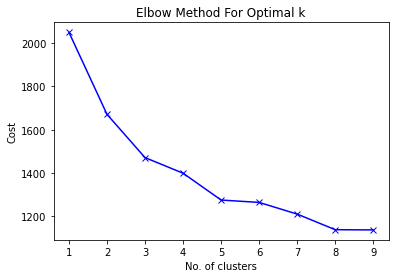

In [173]:
# Elbow curve to find optimal K
cost = []
K = range(1,10)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_all_rows)
    cost.append(kmode.cost_) #Cost is the sum of all the dissimilarities between the clusters.
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

*Optimum k value was 5*

__K-Mode clustering (k=5)__

In [347]:
kmode = KModes(n_clusters=5, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(df_all_rows)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 115, cost: 1437.0
Run 1, iteration: 2/100, moves: 6, cost: 1434.0
Run 1, iteration: 3/100, moves: 0, cost: 1434.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 177, cost: 1378.0
Run 2, iteration: 2/100, moves: 10, cost: 1370.0
Run 2, iteration: 3/100, moves: 0, cost: 1370.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 157, cost: 1268.0
Run 3, iteration: 2/100, moves: 35, cost: 1266.0
Run 3, iteration: 3/100, moves: 1, cost: 1266.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 238, cost: 1388.0
Run 4, iteration: 2/100, moves: 53, cost: 1381.0
Run 4, iteration: 3/100, moves: 47, cost: 1292.0
Run 4, iteration: 4/100, moves: 34, cost: 1266.0
Run 4, iteration: 5/100, moves: 4, cost: 12

array([3, 0, 3, 1, 3, 1, 1, 0, 1, 1, 4, 3, 4, 1, 4, 3, 1, 2, 4, 3, 1, 1,
       4, 1, 1, 3, 1, 4, 2, 4, 1, 1, 1, 2, 2, 2, 3, 1, 3, 1, 1, 1, 0, 1,
       3, 3, 3, 0, 2, 1, 1, 1, 0, 3, 1, 1, 3, 0, 0, 1, 0, 3, 1, 3, 3, 2,
       4, 0, 4, 2, 1, 0, 0, 4, 0, 3, 2, 4, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3,
       1, 3, 4, 0, 1, 0, 0, 2, 4, 3, 3, 1, 0, 0, 4, 0, 4, 3, 3, 4, 1, 4,
       4, 1, 0, 4, 0, 2, 4, 2, 0, 4, 1, 2, 2, 0, 2, 4, 1, 0, 1, 3, 2, 3,
       3, 3, 3, 1, 3, 1, 0, 0, 3, 0, 4, 0, 1, 4, 4, 0, 2, 0, 1, 1, 4, 1,
       1, 3, 1, 1, 1, 0, 4, 2, 0, 4, 3, 1, 1, 2, 0, 4, 0, 4, 0, 2, 0, 1,
       3, 2, 2, 1, 3, 3, 2, 3, 0, 4, 4, 4, 3, 3, 0, 2, 0, 3, 1, 0, 0, 1,
       4, 4, 1, 4, 4, 1, 0, 1, 1, 4, 1, 1, 4, 1, 1, 4, 1, 2, 4, 3, 1, 4,
       2, 2, 2, 0, 0, 3, 0, 3, 1, 1, 3, 3, 0, 0, 3, 3, 3, 4, 2, 2, 3, 4,
       3, 0, 4, 1, 0, 3, 1, 2, 1, 1, 1, 4, 4, 1, 0, 0, 0, 0, 1, 2, 4, 4,
       0, 4, 1, 0, 1, 4, 1, 0, 1, 3, 1, 4, 4, 1, 2, 4, 2, 0, 4, 1, 4, 1,
       1, 4, 0, 0, 2, 4, 1, 1, 1, 2, 1, 3, 0, 0, 4,

In [348]:
df_all_rows=df_all_rows.drop(columns = ['Cluster'])
df_all_rows.head()

,,,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
name,latitude,longitude,,,,,,,,,,,,,,,,,,
Fancy Donuts Kudamm,52.504303,13.332094,A,A,Not Available,Not Available,Not Available,Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Clubrestaurant am Wannsee,52.428818,13.182421,A,A,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Available,Available,Not Available
Burger Turm,52.527200,13.332520,A,A,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Ataya Caffe,52.547062,13.427194,A,A,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available
100 Gramm Bar,52.530407,13.401753,A,A,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available


In [349]:
df_all_rows.insert(0, "Cluster", clusters, True)

In [350]:
df_all_rows.head(20)

,,,Cluster,ranking_category,rating_category,Bar,Italian,Japanese,American,Steakhouse,Cafe,Indian,Asian,Healthy,German,Central European,Mediterranean,European,Vegan Options,Gluten Free Options,Seafood
name,latitude,longitude,,,,,,,,,,,,,,,,,,,
Fancy Donuts Kudamm,52.504303,13.332094,3,A,A,Not Available,Not Available,Not Available,Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Clubrestaurant am Wannsee,52.428818,13.182421,0,A,A,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Available,Available,Not Available
Burger Turm,52.527200,13.332520,3,A,A,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Ataya Caffe,52.547062,13.427194,1,A,A,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available
100 Gramm Bar,52.530407,13.401753,3,A,A,Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available
Cafe Couscous - Vege,52.526882,13.387203,1,A,A,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available
Happies,52.541405,13.419829,1,A,A,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Not Available
Restaurant Buschbeck's,52.505695,13.292050,0,A,A,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Available,Not Available,Available,Available,Available,Not Available
CEDRE BLANC,52.517487,13.293852,1,A,A,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Available,Not Available,Not Available


__Observing the clusters__

In [352]:
df_all_rows.groupby(['Cluster']).size()

Cluster
0    117
1    122
2     62
3    100
4     99
dtype: int64

Only key observations

In [353]:
df_all_rows.groupby(['Cluster','ranking_category']).size()

Cluster  ranking_category
0        A                   26
         B                   20
         C                   23
         D                   24
         E                   24
1        A                   44
         B                   18
         C                   29
         D                   14
         E                   17
2        B                   12
         C                   21
         D                   12
         E                   17
3        A                   10
         B                   16
         C                   12
         D                   37
         E                   25
4        A                   20
         B                   34
         C                   15
         D                   13
         E                   17
dtype: int64

In [354]:
df_all_rows.groupby(['Cluster','rating_category']).size()

Cluster  rating_category
0        A                  15
         B                  66
         C                  36
1        A                  31
         B                  80
         C                  11
2        A                   5
         B                  47
         C                  10
3        A                  15
         B                  67
         C                  18
4        A                   9
         B                  72
         C                  18
dtype: int64

In [355]:
df_all_rows.groupby(['Cluster','Bar']).size()

Cluster  Bar          
0        Available         19
         Not Available     98
1        Available         10
         Not Available    112
2        Not Available     62
3        Available         19
         Not Available     81
4        Not Available     99
dtype: int64

In [356]:
df_all_rows.groupby(['Cluster','Steakhouse']).size()

Cluster  Steakhouse   
0        Available          9
         Not Available    108
1        Available         10
         Not Available    112
2        Available          1
         Not Available     61
3        Available         12
         Not Available     88
4        Available          3
         Not Available     96
dtype: int64

In [357]:
df_all_rows.groupby(['Cluster','Cafe']).size()

Cluster  Cafe         
0        Available          3
         Not Available    114
1        Available         12
         Not Available    110
2        Not Available     62
3        Available          8
         Not Available     92
4        Available          2
         Not Available     97
dtype: int64

In [358]:
df_all_rows.groupby(['Cluster','Vegan Options']).size()

Cluster  Vegan Options
0        Available         33
         Not Available     84
1        Available        111
         Not Available     11
2        Available         60
         Not Available      2
3        Available         25
         Not Available     75
4        Available         79
         Not Available     20
dtype: int64

In [359]:
df_all_rows.groupby(['Cluster','Gluten Free Options']).size()

Cluster  Gluten Free Options
0        Available               43
         Not Available           74
1        Available              104
         Not Available           18
2        Available               46
         Not Available           16
3        Available                9
         Not Available           91
4        Available               64
         Not Available           35
dtype: int64

In [360]:
df_all_rows.groupby(['Cluster','Healthy']).size()

Cluster  Healthy      
0        Available          6
         Not Available    111
1        Available         27
         Not Available     95
2        Available         11
         Not Available     51
3        Available          5
         Not Available     95
4        Available         10
         Not Available     89
dtype: int64

In [361]:
df_all_rows.groupby(['Cluster','Seafood']).size()

Cluster  Seafood      
0        Available          3
         Not Available    114
1        Available          3
         Not Available    119
2        Available         12
         Not Available     50
3        Available          4
         Not Available     96
4        Available         27
         Not Available     72
dtype: int64

In [362]:
df_all_rows.groupby(['Cluster','European']).size()

Cluster  European     
0        Available        112
         Not Available      5
1        Available         28
         Not Available     94
2        Not Available     62
3        Available         22
         Not Available     78
4        Available         91
         Not Available      8
dtype: int64

In [363]:
df_all_rows.groupby(['Cluster','Asian']).size()

Cluster  Asian        
0        Not Available    117
1        Available          7
         Not Available    115
2        Available         62
3        Available          6
         Not Available     94
4        Not Available     99
dtype: int64

In [364]:
df_all_rows.groupby(['Cluster','American']).size()

Cluster  American     
0        Available          1
         Not Available    116
1        Available         12
         Not Available    110
2        Not Available     62
3        Available         17
         Not Available     83
4        Not Available     99
dtype: int64

In [365]:
df_all_rows.groupby(['Cluster','German']).size()

Cluster  German       
0        Available         87
         Not Available     30
1        Available         14
         Not Available    108
2        Not Available     62
3        Available         14
         Not Available     86
4        Available          2
         Not Available     97
dtype: int64

In [366]:
df_all_rows.groupby(['Cluster','Mediterranean']).size()

Cluster  Mediterranean
0        Available          1
         Not Available    116
1        Available         14
         Not Available    108
2        Not Available     62
3        Available          9
         Not Available     91
4        Available         90
         Not Available      9
dtype: int64

In [367]:
df_all_rows.groupby(['Cluster','Italian']).size()

Cluster  Italian      
0        Not Available    117
1        Available          6
         Not Available    116
2        Not Available     62
3        Available          4
         Not Available     96
4        Available         62
         Not Available     37
dtype: int64

In [368]:
df_all_rows.groupby(['Cluster','Central European']).size()

Cluster  Central European
0        Available           108
         Not Available         9
1        Available            15
         Not Available       107
2        Not Available        62
3        Available             3
         Not Available        97
4        Available            16
         Not Available        83
dtype: int64

*2 types of clusters were formed in general*

MAIN OBSERVATIONS in first clustering: <br/><br/>
CLUSTER 0: most top ten, most seafood, no asian, no american, no german, most Mediterranean, most Italian <br/>
CLUSTER 1: most top rated, most cafes, most american <br/>
CLUSTER 2: least vegan options, all Gluten Free Options <br/>
CLUSTER 3: most bars, least healthy, most european, no asian, most german, no Italian, most Central European <br/>
CLUSTER 4: least top ranked and least top rated, no bars, no steakhouse, no cafe, all except 1 had vegan options available, no european, all are asian, no american, no german, no Mediterranean, no Italian, no Central European <br/>

MAIN OBSERVATIONS in second clustering: <br/><br/>
CLUSTER 0: most top ranked, most top rated, most steakhouse, most cafe, Vegan Options, Gluten Free Options, most Healthy, most Asian, most Mediterranean  <br/>
CLUSTER 1: no bars, most seafood, most european <br/>
CLUSTER 2: <br/>
CLUSTER 3: least top ranked and least top rated, no bars, no steakhouse <br/>
CLUSTER 4: <br/>

MAIN OBSERVATIONS in the third clustering: <br/><br/>
CLUSTER 0: most bars, most steakhouse, most American <br/>
CLUSTER 1: no bar, most seafood, most european, no American, most Mediterranean, most Italian <br/>
CLUSTER 2: most bars, most German, no Italian <br/>
CLUSTER 3: least top rated and least ranked, no bar, no cafe, no european, all Asian, no American, no German, no Italian, only 1 steakhouse <br/>
CLUSTER 4: most top rated, most top ranked, most cafe, most healthy <br/>

MAIN OBSERVATIONS in the latest clustering: <br/><br/>
CLUSTER 0: most bar, most European, no Asian, most German, no Italian <br/>
CLUSTER 1: most top ranked, most top rated, most cafe, most Healthy <br/>
CLUSTER 2: no top ranked, least top rated, no bar, no cafe, no European, all Asian, no American, no German, no Mediterranean, no Italian <br/>
CLUSTER 3: most bar, most steakhouse, least Gluten Free Options, least Healthy, most American <br/>
CLUSTER 4: no bar, most seafood, no Asian, no American, most Medeterranean, most Italian <br/>

In [247]:
# first clustering
df_all_rows.groupby(['Cluster']).size()

Cluster
0    117
1     99
2    101
3    122
4     61
dtype: int64

In [204]:
# second clustering
df_all_rows.groupby(['Cluster']).size()

Cluster
0    183
1     59
2    116
3     41
4    101
dtype: int64

In [324]:
# third clustering
df_all_rows.groupby(['Cluster']).size()

Cluster
0    100
1     99
2    117
3     62
4    122
dtype: int64

In [351]:
# latest clustering
df_all_rows.groupby(['Cluster']).size()

Cluster
0    117
1    122
2     62
3    100
4     99
dtype: int64

#### __KEY OBSERVATIONS__

* Cafes were most top rated <br/>
* Top ranked restaurants were mostly having healthy, seafood, Mediterranean, or Italian cuisines<br/>
* Bars were mostly German <br/>
* Asian cuisines were least ranked and least top rated

### __Synthesis: Providing sensible suggestions with the observations made on the limited data available__

* Best options would be to open a cafe or restaurant with healthy/seafood/Mediterranean/Italian cuisines
* Bars would be a competitive market with local German and European cuisines
* Avoid or have less Asian cuisines

__SAVING LATEST DATA FOR VISUALIZATION OF THE CLUSTERS WITH LOCATIONS__

In [370]:
df_all_rows.to_csv('cluster.csv', index = True)

In [2]:
cluster_df = pd.read_csv(r'cluster.csv')

In [3]:
cluster_df = cluster_df[['name','latitude','longitude','Cluster']]
#cluster_df.head(10)

#Cluster 0: most bars, most German, most European
#Cluster 1: most top ranked and top rated
#Cluster 2: no top ranked and least top rated
#Cluster 3: least Healthy (bars, steakhouse)
#Cluster 4: most seafood, Mediterranean, Italian


In [378]:
cluster_df.to_csv('clusterviz.csv', index = False)

#### After observing the clusters from the map:
--------------------------------------------------------------------------------------------------------------------------------

Few suggestions based on demographic and competitions; ignoring budget, accessibility, crime, size and space requirements or other data that is not available

Demographics: If your target audience consist of students then consider opening an inexpensive restaurant. <br/>
Competition: If the area has more top rated and top ranked restaurants then either avoid or find a way to funnel the people to your location<br/>
Few examples of point of interests:

<br/>
1. Berlin <br/>
A lot of the city has top class restaurants especially in the heart of the city. But near Tegel airport there is none. Might need to find a way to attract the audience from these other locations.<br/>

<br/>
2. Munich <br/>
The triangular area formed by LMU (Ludwig Maximilian University of Munich), TU Munich (Technical University of Munich) and Munich Main Station. Could potentially attract students and other crowds to an inexpensive restaurant.<br/>

<br/>
3. Hamburg <br/>
A difficult city to find a location with the available data. Altona county could have some potential.<br/>

<br/>
4. Frankfurt <br/>
Most of the city has top-class restaurants spread all over. Either avoid or find a way to funnel the people to your location.<br/>

<br/>
5. Essen <br/>
Near University of Duisburg-Essen. Most are low rated/ranked near this location. <br/>

<br/>
6. Stuttgart <br/>
Stuttgart West region has lack of top-class restaurants.<br/>

<br/>
7. Dortmund <br/>
Need more data.<br/>

<br/>
8. Duesseldorf <br/>
Near Duesseldorf Airport. <br/>

<br/>
9. Hannover <br/>
Near University of Hannover. No top 50 restaurants located nearby. <br/>

<br/>
10. Leipzig <br/>
A lot of restaurants are present near Universität Leipzig, but none of them are top rated/ranked.<br/>

<br/>

-----------------------------------------------------------------------------------------------------------------------------
__These are just some examples from the overview for a starting point.
More data and research will be required for further steps.__